In [1]:
import os
import tkinter as tk
from tkinter import ttk, filedialog, messagebox, scrolledtext
import threading
import numpy as np
import tensorflow as tf
from keras import layers, models
import pandas as pd
from scipy.interpolate import interp1d
import time
from datetime import datetime
import logging
from pathlib import Path

2025-09-09 15:05:10.484242: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import tools

In [3]:
paths = [
    '/home/arisenthil/capstone2025_python/data/crushcore_0.75_sep7',
    '/home/arisenthil/capstone2025_python/data/disbond_0.75_sep7'
]

results = tools.train_classification_model(
    data_paths=paths,
    model_save_name="classifier_model",
    epochs=10
)

Loading data from paths...
Generating wav files...


I0000 00:00:1757448339.022841    7946 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2787 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5


Analyzing audio files...
The audio length in /home/arisenthil/capstone2025_python/wave_files/wave_files_v1_v2 is 160000 and the sample rate is 16000
The no of files is 235
Creating TensorFlow datasets...
Found 480 files belonging to 2 classes.
Using 384 files for training.
Using 96 files for validation.
Label names:  ['crushcore 0.75' 'disbond 0.75']
Creating spectrogram datasets...


2025-09-09 15:05:46.851871: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Building model...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing (Resizing)             │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization (Normalization)   │ (None, 32, 32, 1)      │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,624,837 (6.20 MB)

 Trainable params: 1,624,834 (6.20 MB)

 Non-trainable params: 3 (16.00 B)

Training model...
Epoch 1/10


2025-09-09 15:05:48.910807: I external/local_xla/xla/service/service.cc:163] XLA service 0x752e98005d60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-09-09 15:05:48.910838: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 Ti, Compute Capability 7.5
2025-09-09 15:05:48.953521: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-09-09 15:05:49.256532: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91300
2025-09-09 15:05:49.892815: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[1,64,28,28]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,32,30,30]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cu

 35/384 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3374 - loss: 0.7559

I0000 00:00:1757448351.810484    8049 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


378/384 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6093 - loss: 0.5991

2025-09-09 15:05:53.667333: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[1,64,28,28]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,32,30,30]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}


384/384 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7656 - loss: 0.4394 - val_accuracy: 0.9583 - val_loss: 0.1086
Epoch 2/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9375 - loss: 0.1428 - val_accuracy: 1.0000 - val_loss: 0.0244
Epoch 3/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9661 - loss: 0.1189 - val_accuracy: 1.0000 - val_loss: 0.0099
Epoch 4/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9766 - loss: 0.0553 - val_accuracy: 1.0000 - val_loss: 0.0089
Epoch 5/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9818 - loss: 0.0408 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 6/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9870 - loss: 0.0526 - val_accuracy: 1.0000 - val_loss: 0.0071
Epoch 7/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 8/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9870 - loss: 0.0245 - val_accuracy: 1.0000 - val_

INFO:tensorflow:Assets written to: /home/arisenthil/capstone2025_python/saved_models/classifier_model/assets


Model saved successfully to: /home/arisenthil/capstone2025_python/saved_models/classifier_model


In [4]:
results

{'model': <Sequential name=sequential, built=True>,
 'history': <keras.src.callbacks.history.History at 0x752f9e771390>,
 'model_path': '/home/arisenthil/capstone2025_python/saved_models/classifier_model',
 'test_spectrogram_ds': <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 1249, 129, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 'label_names': array(['crushcore 0.75', 'disbond 0.75'], dtype='<U14'),
 'train_spectrogram_ds': <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 1249, 129, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 'val_spectrogram_ds': <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 1249, 129, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>}

In [5]:
model = results['model']
history = results['history']
model_path = results['model_path']
test_spectrogram_ds = results['test_spectrogram_ds']
label_names = results['label_names']

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0292
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2025-09-09 15:07:25.996444: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


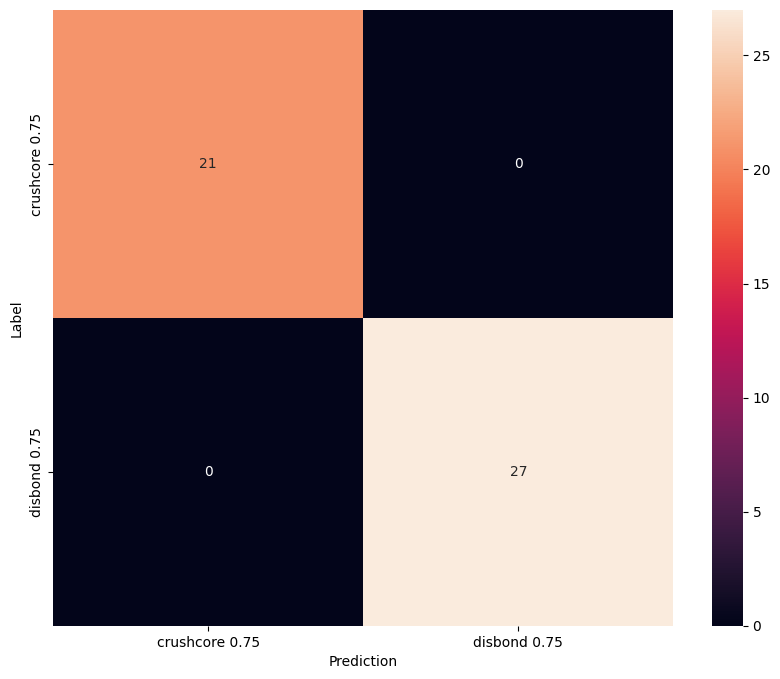

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


model.evaluate(test_spectrogram_ds, return_dict=True)

y_pred = model.predict(test_spectrogram_ds)
y_pred = tf.argmax(y_pred, axis=1)

y_true = tf.concat(list(test_spectrogram_ds.map(lambda s,lab: lab)), axis=0)

confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=label_names,
            yticklabels=label_names,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

Text(0, 0.5, 'Accuracy [%]')

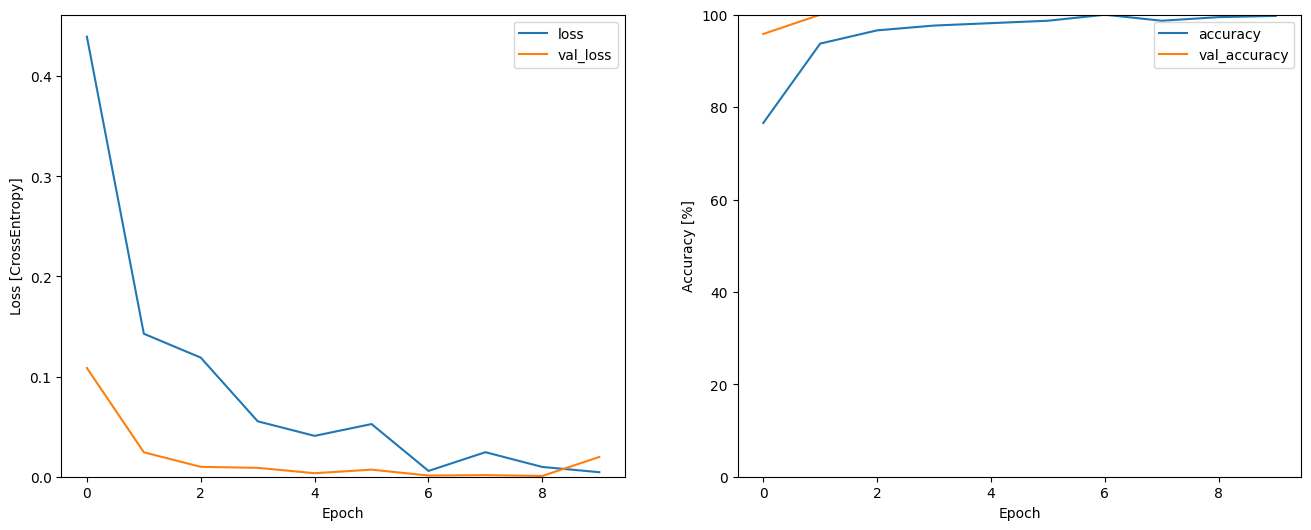

In [7]:
metrics = history.history
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch')
plt.ylabel('Loss [CrossEntropy]')

plt.subplot(1,2,2)
plt.plot(history.epoch, 100*np.array(metrics['accuracy']), 100*np.array(metrics['val_accuracy']))
plt.legend(['accuracy', 'val_accuracy'])
plt.ylim([0, 100])
plt.xlabel('Epoch')
plt.ylabel('Accuracy [%]')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from matplotlib.backends.backend_pdf import PdfPages
from datetime import datetime
import os

def generate_model_evaluation_pdf(model, history, test_spectrogram_ds, label_names, 
                                model_path=None, output_path=None, figsize=(12, 8)):
    """
    Generate a comprehensive PDF report with model evaluation metrics and plots.
    
    Parameters:
    -----------
    model : tf.keras.Model
        Trained TensorFlow/Keras model
    history : tf.keras.callbacks.History
        Training history object containing metrics
    test_spectrogram_ds : tf.data.Dataset
        Test dataset for evaluation
    label_names : list
        List of class/label names
    model_path : str, optional
        Path to the saved model (for documentation)
    output_path : str, optional
        Output path for the PDF file. If None, generates timestamp-based filename
    figsize : tuple, optional
        Figure size for plots (width, height)
    
    Returns:
    --------
    str : Path to the generated PDF file
    """
    
    # Generate output filename if not provided
    if output_path is None:
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        output_path = f"model_evaluation_report_{timestamp}.pdf"
    
    # Evaluate model and get predictions
    print("Evaluating model...")
    eval_results = model.evaluate(test_spectrogram_ds, return_dict=True, verbose=0)
    
    print("Generating predictions...")
    y_pred = model.predict(test_spectrogram_ds, verbose=0)
    y_pred = tf.argmax(y_pred, axis=1)
    y_true = tf.concat(list(test_spectrogram_ds.map(lambda s, lab: lab)), axis=0)
    
    # Calculate confusion matrix
    confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
    
    # Create PDF with multiple pages
    with PdfPages(output_path) as pdf:
        
        # Page 1: Model Summary and Evaluation Metrics
        fig = plt.figure(figsize=figsize)
        fig.suptitle('Model Evaluation Report', fontsize=16, fontweight='bold')
        
        # Remove axes and add text summary
        ax = fig.add_subplot(111)
        ax.axis('off')
        
        # Prepare summary text
        summary_text = f"""
Model Evaluation Summary
{'=' * 50}

Model Path: {model_path if model_path else 'Not specified'}
Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

Test Set Performance:
"""
        
        for metric, value in eval_results.items():
            if isinstance(value, float):
                summary_text += f"  {metric.capitalize()}: {value:.4f}\n"
            else:
                summary_text += f"  {metric.capitalize()}: {value}\n"
        
        summary_text += f"""
Dataset Information:
  Number of Classes: {len(label_names)}
  Class Names: {', '.join(label_names)}

Training Information:
  Total Epochs: {len(history.history['loss'])}
  Final Training Loss: {history.history['loss'][-1]:.4f}
  Final Validation Loss: {history.history['val_loss'][-1]:.4f}
  Final Training Accuracy: {history.history['accuracy'][-1]:.4f}
  Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}
"""
        
        ax.text(0.05, 0.95, summary_text, transform=ax.transAxes, fontsize=12,
                verticalalignment='top', fontfamily='monospace')
        
        pdf.savefig(fig, bbox_inches='tight')
        plt.close()
        
        # Page 2: Confusion Matrix
        fig, ax = plt.subplots(figsize=figsize)
        fig.suptitle('Confusion Matrix', fontsize=16, fontweight='bold')
        
        sns.heatmap(confusion_mtx, 
                   xticklabels=label_names, 
                   yticklabels=label_names,
                   annot=True, 
                   fmt='g', 
                   cmap='Blues',
                   ax=ax)
        
        ax.set_xlabel('Predicted Label', fontsize=12)
        ax.set_ylabel('True Label', fontsize=12)
        
        # Add accuracy per class
        confusion_mtx_np = confusion_mtx.numpy()
        class_accuracies = np.diag(confusion_mtx_np) / np.sum(confusion_mtx_np, axis=1)
        
        # Add text box with per-class accuracies
        acc_text = "Per-Class Accuracy:\n" + "\n".join([
            f"{label}: {acc:.3f}" for label, acc in zip(label_names, class_accuracies)
        ])
        
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
        ax.text(1.02, 1, acc_text, transform=ax.transAxes, fontsize=10,
                verticalalignment='top', bbox=props)
        
        pdf.savefig(fig, bbox_inches='tight')
        plt.close()
        
        # Page 3: Training History - Loss and Accuracy
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        fig.suptitle('Training History', fontsize=16, fontweight='bold')
        
        # Loss plot
        metrics = history.history
        epochs = range(1, len(metrics['loss']) + 1)
        
        ax1.plot(epochs, metrics['loss'], 'b-', label='Training Loss', linewidth=2)
        ax1.plot(epochs, metrics['val_loss'], 'r-', label='Validation Loss', linewidth=2)
        ax1.set_title('Model Loss', fontsize=14)
        ax1.set_xlabel('Epoch', fontsize=12)
        ax1.set_ylabel('Loss [CrossEntropy]', fontsize=12)
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        ax1.set_ylim([0, max(max(metrics['loss']), max(metrics['val_loss'])) * 1.1])
        
        # Accuracy plot
        ax2.plot(epochs, [x*100 for x in metrics['accuracy']], 'b-', 
                label='Training Accuracy', linewidth=2)
        ax2.plot(epochs, [x*100 for x in metrics['val_accuracy']], 'r-', 
                label='Validation Accuracy', linewidth=2)
        ax2.set_title('Model Accuracy', fontsize=14)
        ax2.set_xlabel('Epoch', fontsize=12)
        ax2.set_ylabel('Accuracy [%]', fontsize=12)
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        ax2.set_ylim([0, 100])
        
        plt.tight_layout()
        pdf.savefig(fig, bbox_inches='tight')
        plt.close()
        
        # Page 4: Class Distribution Analysis
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
        fig.suptitle('Class Distribution Analysis', fontsize=16, fontweight='bold')
        
        # Class distribution in test set
        unique, counts = np.unique(y_true.numpy(), return_counts=True)
        ax1.bar([label_names[i] for i in unique], counts, alpha=0.7, color='skyblue')
        ax1.set_title('Test Set Class Distribution')
        ax1.set_ylabel('Number of Samples')
        ax1.tick_params(axis='x', rotation=45)
        
        # Prediction distribution
        unique_pred, counts_pred = np.unique(y_pred.numpy(), return_counts=True)
        ax2.bar([label_names[i] for i in unique_pred], counts_pred, alpha=0.7, color='lightcoral')
        ax2.set_title('Prediction Distribution')
        ax2.set_ylabel('Number of Predictions')
        ax2.tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        pdf.savefig(fig, bbox_inches='tight')
        plt.close()
    
    print(f"PDF report generated successfully: {output_path}")
    return output_path

pdf_path = generate_model_evaluation_pdf(
    model=model,
    history=history,
    test_spectrogram_ds=test_spectrogram_ds,
    label_names=label_names,
    model_path=model_path,
    output_path=os.path.join(os.getcwd(), "report", os.path.splitext(os.path.basename(model_path))[0] + "_evaluation.pdf")
)

In [ ]:
# Example usage:
def example_usage():
    """
    Example of how to use the function with your data:
    
    # Assuming you have your results dictionary:
    model = results['model']
    history = results['history']
    model_path = results['model_path']
    test_spectrogram_ds = results['test_spectrogram_ds']
    label_names = results['label_names']
    
    # Generate the PDF report
    pdf_path = generate_model_evaluation_pdf(
        model=model,
        history=history,
        test_spectrogram_ds=test_spectrogram_ds,
        label_names=label_names,
        model_path=model_path,
        output_path="my_model_evaluation.pdf"
    )
    
    print(f"Report saved to: {pdf_path}")
    """
    pass


pdf_path = generate_model_evaluation_pdf(
        model=model,
        history=history,
        test_spectrogram_ds=test_spectrogram_ds,
        label_names=label_names,
        model_path=model_path,
        output_path="my_model_dn.pdf"
    )
    

Evaluating model...
Generating predictions...
PDF report generated successfully: my_model_dn.pdf


In [22]:

last_part = os.path.basename(model_path)
print(last_part)
report_path = os.path.join(os.getcwd(), "report", last_part)
print(report_path)

classifier_model
/home/arisenthil/capstone2025_python/report/classifier_model


In [23]:
pdf_path = generate_model_evaluation_pdf(
    model=model,
    history=history,
    test_spectrogram_ds=test_spectrogram_ds,
    label_names=label_names,
    model_path=model_path,
    output_path=os.path.join(os.getcwd(), "report", os.path.splitext(os.path.basename(model_path))[0] + "_evaluation.pdf")
)

Evaluating model...
Generating predictions...


2025-09-09 15:35:36.781729: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


PDF report generated successfully: /home/arisenthil/capstone2025_python/report/classifier_model_evaluation.pdf


# Test